Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4161 - loss: 0.6946 - val_accuracy: 0.4000 - val_loss: 0.6956
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5541 - loss: 0.6903 - val_accuracy: 0.4000 - val_loss: 0.6962
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5619 - loss: 0.6886 - val_accuracy: 0.4000 - val_loss: 0.6972
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5322 - loss: 0.6862 - val_accuracy: 0.4000 - val_loss: 0.6979
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5186 - loss: 0.6842 - val_accuracy: 0.4000 - val_loss: 0.6983
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5419 - loss: 0.6802 - val_accuracy: 0.4000 - val_loss: 0.6988
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7491 - loss: 0.6703 - val_accuracy: 0.4000 - val_loss: 0.7008
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8965 - loss: 0.6504 - val_accuracy: 0.4000 - val_loss

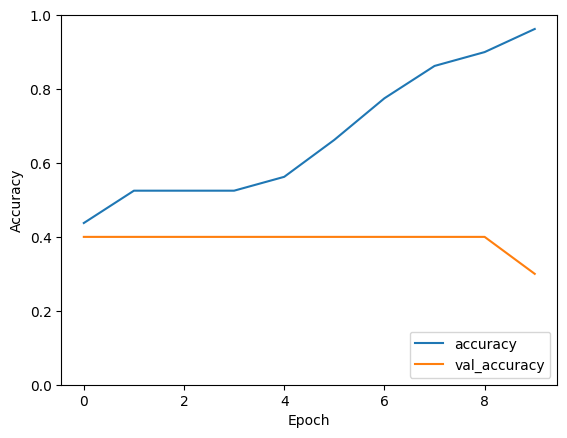

In [8]:
# Install necessary libraries
!pip install tensorflow

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Lists of positive and negative words
positive_words = [
    "Happy", "Joyful", "Cheerful", "Good", "Excellent", "Wonderful", "Amazing", "Fantastic",
    "Positive", "Bright", "Optimistic", "Lovely", "Kind", "Peaceful", "Friendly", "Delightful",
    "Energetic", "Successful", "Hopeful", "Encouraging", "Beautiful", "Inspiring", "Blessed",
    "Healthy", "Vibrant", "Excited", "Proud", "Harmonious", "Grateful", "Motivated", "Accomplished",
    "Strong", "Satisfied", "Confident", "Generous", "Caring", "Supportive", "Lucky", "Fun", "Loving",
    "Pure", "Adventurous", "Radiant", "Courageous", "Thriving", "Flourishing", "Joyous", "Appreciative",
    "Serene", "Bright-hearted"
]

negative_words = [
    "Sad", "Angry", "Miserable", "Terrible", "Awful", "Depressed", "Hopeless", "Disappointing",
    "Gloomy", "Unhappy", "Disgusted", "Painful", "Horrible", "Frustrated", "Displeased", "Defeated",
    "Angry", "Lonely", "Annoyed", "Regretful", "Hurt", "Dejected", "Abandoned", "Sick", "Scared", "Nervous",
    "Troubled", "Despairing", "Bitter", "Lonely", "Fearful", "Unfortunate", "Miserable", "Frightened",
    "Discontented", "Disheartened", "Stressed", "Insecure", "Terrifying", "Pessimistic", "Guilty",
    "Distraught", "Disconnected", "Defenseless", "Tired", "Hopeless", "Weak", "Unfulfilled", "Nervous",
    "Distressed"
]

# Combine both lists and create labels
words = positive_words + negative_words
labels = [1] * len(positive_words) + [0] * len(negative_words)

# Tokenize the words
tokenizer = Tokenizer()
tokenizer.fit_on_texts(words)
sequences = tokenizer.texts_to_sequences(words)

# Pad sequences to ensure uniform input size
max_length = max([len(seq) for seq in sequences])
X = pad_sequences(sequences, maxlen=max_length, padding='post')

# Convert labels to numpy array
y = np.array(labels)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the FFNN model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=10, input_length=max_length),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test))

# Test the model with an unseen word
test_word = "excited"  # Change this to test other words
test_sequence = tokenizer.texts_to_sequences([test_word])
test_input = pad_sequences(test_sequence, maxlen=max_length, padding='post')
prediction = model.predict(test_input)

print(f"The word '{test_word}' is predicted as {'positive' if prediction >= 0.5 else 'negative'}")

# Plot the training history
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()


In [10]:
# Test the model with multiple unseen words
words_to_test = ["good", "bad", "hydrated", "dehydrated", "moon"]

# Loop through each word and make predictions
for test_word in words_to_test:
    test_sequence = tokenizer.texts_to_sequences([test_word])
    test_input = pad_sequences(test_sequence, maxlen=max_length, padding='post')
    prediction = model.predict(test_input)

    # Print the result for each word
    print(f"The word '{test_word}' is predicted as {'positive' if prediction >= 0.5 else 'negative'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
The word 'good' is predicted as positive
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
The word 'bad' is predicted as negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
The word 'hydrated' is predicted as negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
The word 'dehydrated' is predicted as negative
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
The word 'moon' is predicted as negative
